In [2]:
from pymongo import MongoClient

mongodb_host = "143.248.36.150"
port_ = 27017
username_ ="nft"
password_ = "nft!@#"
DBname_ = "transactionNFTDB"
client = MongoClient(host = mongodb_host, port = port_ , username = username_ , password = password_, authSource = "twitterNFTDB" )
db = client[DBname_ ]

In [3]:
import pandas as pd

data = pd.DataFrame(list(db.trader.find()))

In [151]:
data.head()

,_id,wallet_addr,sell_history,sell_count,buy_history,buy_count,mint_count,mint_history,holding_time,is_whale,...,hold_top1000_portion,buy_avg_rank,buy_top1000_portion,sell_avg_rank,sell_top1000_portion,buy_btx_time,mint_btx_time,sell_btx_time,btx_time,whale_rank
0,61fd18536143602131c34a92,0xf26a9aed9be8ea2656b93123aab6bd8545f940c9,[],0,[],0,3,"[{'transaction_time': 2022-01-15 05:04:05, 'to...",23.614352,False,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,61fd18536143602131c34a93,0x9d75c58578e42b75f67ad732817090e35b6e03c5,"[{'transaction_time': 2021-10-13 03:55:35, 'to...",1,"[{'transaction_time': 2021-10-12 21:55:45, 'to...",1,0,[],0.249884,False,...,NaN,51.0,1.000000,51.0,1.0,NaN,NaN,NaN,NaN,NaN
2,61fd18536143602131c34a94,0xacfe6e218ad3466322cc2f45e988c55872f673c6,"[{'transaction_time': 2021-08-31 07:37:12, 'to...",1,[],0,0,[],67.472649,False,...,NaN,NaN,NaN,27.0,1.0,NaN,NaN,NaN,"{'buy': nan, 'sell': nan, 'mint': nan}",NaN
3,61fd18536143602131c34a95,0x6d213a9a03801752c9553c53bcdcf754cd23cc8b,[],0,"[{'transaction_time': 2022-01-02 12:55:40, 'to...",3,0,[],35.825710,False,...,0.666667,640.0,0.666667,NaN,NaN,0.670284,NaN,NaN,"{'buy': 0.6702835648148148, 'sell': nan, 'mint...",NaN
4,61fd18536143602131c34a96,0x325b27683e73f33d2bc3d5b40273588f472b0409,[],0,[],0,0,[],67.472649,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'buy': nan, 'sell': nan, 'mint': nan}",NaN


In [5]:
import numpy as np
from tqdm import tqdm

def test(x):
    if x==False: return 0
    else: return 1

feature = data[['sell_count', 'buy_count', 'mint_count', 'holding_time', 'is_whale', 'buy_avg_rank', 'sell_avg_rank', 'hold_avg_rank', 'hold_top1000_portion', 'buy_top1000_portion', 'sell_top1000_portion', 'buy_btx_time', 'sell_btx_time', 'mint_btx_time']]
# get copy 
temp = feature.copy()

# get means
mean_buy_rank = temp['buy_avg_rank'].mean(skipna = True)
mean_sell_rank = temp['sell_avg_rank'].mean(skipna = True)
mean_hold_rank = temp['hold_avg_rank'].mean(skipna = True)

mean_hold_portion = temp['hold_top1000_portion'].mean(skipna = True)
mean_buy_portion = temp['buy_top1000_portion'].mean(skipna = True)
mean_sell_portion = temp['sell_top1000_portion'].mean(skipna = True)

mean_buy_time = temp['buy_btx_time'].mean(skipna = True)
mean_sell_time = temp['sell_btx_time'].mean(skipna = True)
mean_mint_time = temp['mint_btx_time'].mean(skipna = True)

total_rows = temp.shape[0]
# change nan to avg of corresponding column
for index, row in tqdm(temp.iterrows(), total = total_rows):
    
    if np.isnan(row["buy_avg_rank"]):
        temp.at[index, 'buy_avg_rank'] = mean_buy_rank
    if np.isnan(row["sell_avg_rank"]):
        temp.at[index, 'sell_avg_rank'] = mean_sell_rank
    if np.isnan(row["hold_avg_rank"]):
        temp.at[index, 'hold_avg_rank'] = mean_hold_rank
        
    if np.isnan(row['hold_top1000_portion']):
        temp.at[index, 'hold_top1000_portion'] = mean_hold_portion
    if np.isnan(row['buy_top1000_portion']):
        temp.at[index, 'buy_top1000_portion'] = mean_buy_portion    
    if np.isnan(row['sell_top1000_portion']):
        temp.at[index, 'sell_top1000_portion'] = mean_sell_portion
        
    if np.isnan(row["buy_btx_time"]):
        temp.at[index, 'buy_btx_time'] = mean_buy_time
    if np.isnan(row["sell_btx_time"]):
        temp.at[index, 'sell_btx_time'] = mean_sell_time
    if np.isnan(row["mint_btx_time"]):
        temp.at[index, 'mint_btx_time'] = mean_mint_time

# apply test to whale column
temp["is_whale"] = feature["is_whale"].apply(test)

# feature["buy_avg_rank"] = feature["buy_avg_rank"].apply(nan)
# feature["sell_avg_rank"] = feature["sell_avg_rank"].apply(nan)
# feature["hold_avg_rank"] = feature["hold_avg_rank"].apply(nan)

# feature["hold_top1000_portion"] = feature["hold_top1000_portion"].apply(nan)
# feature["buy_top1000_portion"] = feature["buy_top1000_portion"].apply(nan)
# feature["sell_top1000_portion"] = feature["sell_top1000_portion"].apply(nan)

temp.head()

100%|██████████| 842879/842879 [02:00<00:00, 6988.44it/s]


,sell_count,buy_count,mint_count,holding_time,is_whale,buy_avg_rank,sell_avg_rank,hold_avg_rank,hold_top1000_portion,buy_top1000_portion,sell_top1000_portion,buy_btx_time,sell_btx_time,mint_btx_time
0,0,0,3,23.614352,0,442.70529,409.896344,1000.000000,0.000000,0.726962,0.76554,12.353294,11.397636,8.600437
1,1,1,0,0.249884,0,51.00000,51.000000,567.699777,0.590602,1.000000,1.00000,12.353294,11.397636,8.600437
2,1,0,0,67.472649,0,442.70529,27.000000,567.699777,0.590602,0.726962,1.00000,12.353294,11.397636,8.600437
3,0,3,0,35.825710,0,640.00000,409.896344,640.000000,0.666667,0.666667,0.76554,0.670284,11.397636,8.600437
4,0,0,0,67.472649,0,442.70529,409.896344,567.699777,0.590602,0.726962,0.76554,12.353294,11.397636,8.600437


array([0.63158383, 0.18841127, 0.09968921])

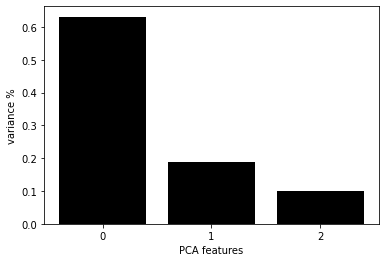

In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# normalization
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(temp)

# pca
pca = PCA(n_components = 3)
df = pca.fit_transform(data_scale)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_ , color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

PCA_components = pd.DataFrame(df)
pca.explained_variance_ratio_

100%|██████████| 9/9 [00:40<00:00,  4.49s/it]


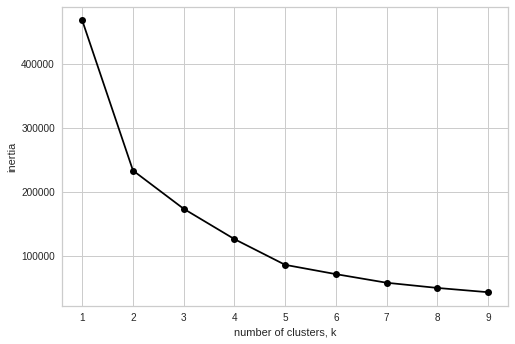

In [160]:
from tqdm import tqdm

ks = range(1, 10)
inertias = []
for k in tqdm(ks):
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

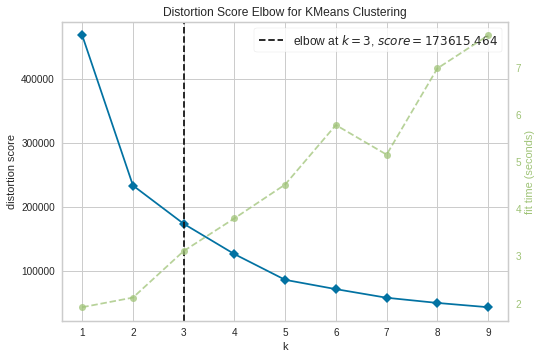

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [7]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# kmeans model
model = KMeans()

# elbow method
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(PCA_components)
visualizer.show()

In [ ]:
# 실루엣 기법인데 너무 오래 돌아가서 결과를 보기가,,,
from sklearn.metrics import silhouette_score

def visualize_silhouette_layer(data, param_init='random', param_n_init=10, param_max_iter=300):
    clusters_range = range(2,15)
    results = []

    for i in tqdm(clusters_range):
        clusterer = KMeans(n_clusters=i, init=param_init, n_init=param_n_init, max_iter=param_max_iter, random_state=0)
        cluster_labels = clusterer.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
    pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

    plt.figure()
    sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm._rocket_lut)
    plt.tight_layout()
    plt.show()

visualize_silhouette_layer(PCA_components)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
db_scan = DBSCAN(eps=0.3, min_samples=5).fit(PCA_components)
df['cluster_db'] = db_scan.labels_
# kmeans
#model = KMeans(n_clusters = 5)
#model.fit(data_scale)
#labels = model.fit_predict(PCA_components)

# concat clustering results to original dataframe
temp_ = temp.copy()
temp_ = pd.concat([temp_, PCA_components], axis=1)
#temp_.columns.values[-3: ] = ['pc1', 'pc2', 'pc3']
#u_labels = np.unique(labels)
#temp_['kmeans_label'] = pd.DataFrame(labels)
temp_.head()

# plot
# fig = px.scatter(temp, color='cluster_group')
# fig.show()

/home/nhpark/anaconda3/envs/jupyter/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


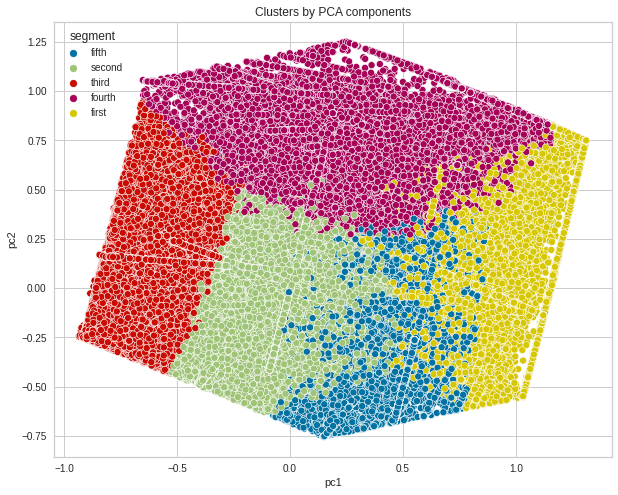

In [208]:
import seaborn as sns
import matplotlib.pyplot as plt

temp_['segment'] = temp_['kmeans_label'].map({0: 'first', 1: 'second', 2: 'third', 3: 'fourth', 4: 'fifth'})
x_axis = temp_['pc1']
y_axis = temp_['pc2']

plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = temp_['segment'])
plt.title('Clusters by PCA components')
plt.show()

In [38]:
# # import the k_pod method
# from kPOD import k_pod

# feature["is_whale"] = feature["is_whale"].apply(test)

# # set the number of clusters desired (in this example, 3)
# K = 3

# # use previously existing data to perform clustering
# clustering_results = k_pod(feature, K)

# # k_pod outputs a tuple with the cluster assignments and centers
# print(clustering_results)
# # Output: (cluster_assignments, cluster_centers)

# # save the cluster assignments and centers
# cluster_assignments = clustering_results[0]
# cluster_centers = clustering_results[1]

/tmp/ipykernel_27410/3757897144.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature["is_whale"] = feature["is_whale"].apply(test)


(array([0., 0., 0., ..., 0., 0., 0.]), [array([3.72508809e+00, 3.84747945e+00, 2.77841660e+00, 6.74723741e+01,
       9.59815867e-04, 4.03776981e+02, 3.28825800e+02, 5.44097242e+02,
       6.48844215e+00, 1.41354738e+01, 3.17757972e+01]), array([1.73573333e+04, 6.10373333e+04, 0.00000000e+00, 1.83280417e+02,
       3.33333333e-01, 3.48778092e+02, 2.10000000e+02, 3.48812601e+02,
       7.05129340e-01, 7.04870011e-01, 1.00000000e+00]), array([4.45808333e+04, 5.54750000e+03, 2.20893333e+04, 4.81793423e+01,
       0.00000000e+00, 3.76051157e+02, 2.18166667e+02, 2.75294661e+02,
       1.58279940e+01, 4.10700188e+01, 8.33333333e-01])])


In [202]:
sell_count = {}
buy_count = {}
mint_count = {}

holding_time = {}

is_whale = {}
whale_rank = {}

buy_avg_rank = {}
sell_avg_rank = {}
hold_avg_rank = {}
hold_top1000_portion = {}
buy_top1000_portion = {}
sell_top1000_portion = {}

buy_btx_time = {}
sell_btx_time = {}
mint_btx_time = {}

cnt_all = {}

In [203]:
from tqdm import tqdm
##################
num_labels = 5 #clustering 개수
##################
all_labels = np.arange(num_labels)

for label_choice in all_labels:
    # -------------- initialize --------------------
    sell_count[label_choice] = []
    buy_count[label_choice] = []
    mint_count[label_choice] = []
    holding_time[label_choice] = []
    is_whale[label_choice] = []
    buy_avg_rank[label_choice] = []
    sell_avg_rank[label_choice] = []
    hold_avg_rank[label_choice] = []
    hold_top1000_portion[label_choice] = []
    buy_top1000_portion[label_choice] = []
    sell_top1000_portion[label_choice] = []
    buy_btx_time[label_choice] = []
    sell_btx_time[label_choice] = []
    mint_btx_time[label_choice] = []

    cnt = 0
    #------------------------------------------------
    for index, row in tqdm(temp_.iterrows(), total=temp_.shape[0]):

        if row['kmeans_label'] == label_choice:
            cnt += 1

            #print(addr_info)
            sell_count[label_choice].append(row['sell_count'])
            buy_count[label_choice].append(row['buy_count'])
            mint_count[label_choice].append(row['mint_count'])

            holding_time[label_choice].append(row['holding_time'])

            is_whale[label_choice].append(row['is_whale'])
            # whale_rank.append(row['whale_rank'])

            buy_avg_rank[label_choice].append(row['buy_avg_rank'])
            sell_avg_rank[label_choice].append(row['sell_avg_rank'])
            hold_avg_rank[label_choice].append(row['hold_avg_rank'])
            
            hold_top1000_portion[label_choice].append(row['hold_top1000_portion'])
            buy_top1000_portion[label_choice].append(row['buy_top1000_portion'])
            sell_top1000_portion[label_choice].append(row['sell_top1000_portion'])
            
            buy_btx_time[label_choice].append(row['buy_btx_time'])
            sell_btx_time[label_choice].append(row['sell_btx_time'])
            mint_btx_time[label_choice].append(row['mint_btx_time'])

    #         buy_btx_time.append(row['buy_btx_time'])
    #         sell_btx_time.append(row['sell_btx_time'])
    #         mint_btx_time.append(row['mint_btx_time'])

    cnt_all[label_choice] = cnt

100%|██████████| 842879/842879 [00:45<00:00, 18597.73it/s]


In [204]:
cnt_all

{0: 115992, 1: 283206, 2: 259554, 3: 68492, 4: 115635}

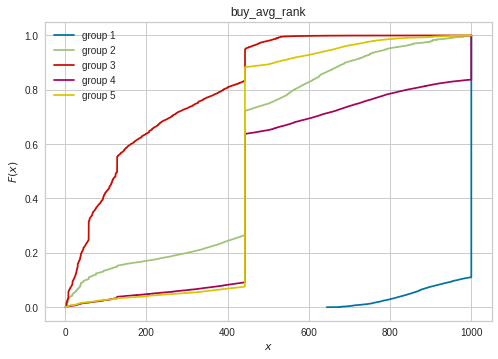

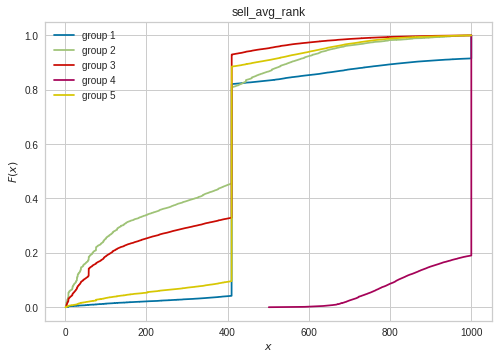

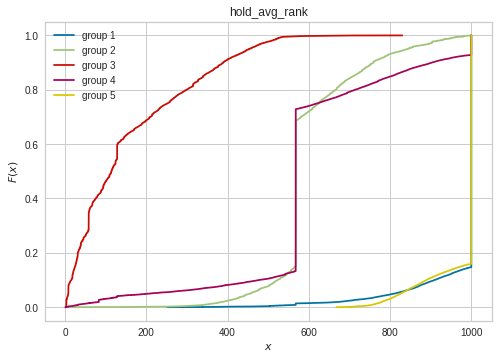

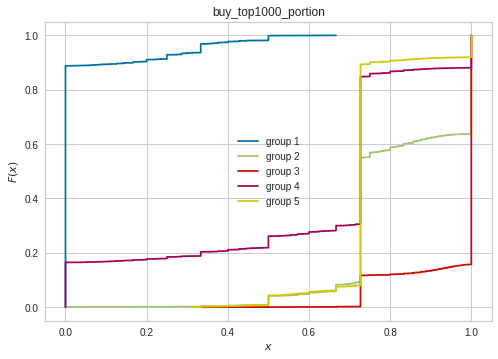

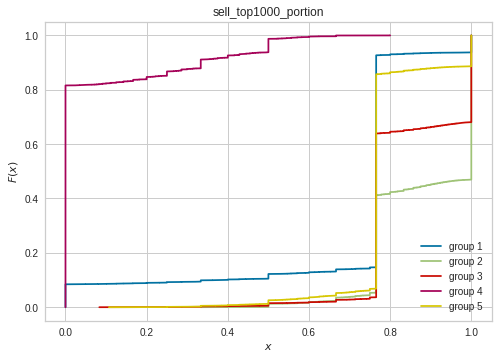

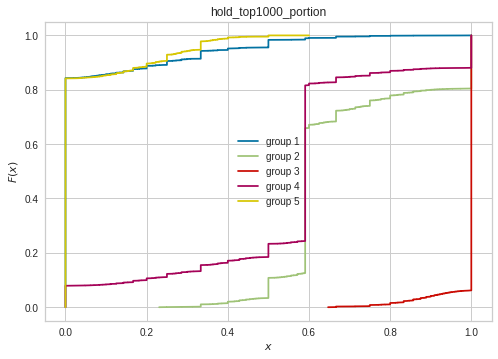

In [212]:
import scipy as sp
import scipy.stats

###################################
# ordinary scale (3*3 + 1)
selected = [buy_avg_rank, sell_avg_rank, hold_avg_rank, buy_top1000_portion, sell_top1000_portion, hold_top1000_portion]
selected_str = ['buy_avg_rank', 'sell_avg_rank', 'hold_avg_rank', 'buy_top1000_portion', 'sell_top1000_portion', 'hold_top1000_portion']

# log scale (3*2)
#selected = [buy_count, sell_count, mint_count, buy_btx_time, sell_btx_time, mint_btx_time, holding_time]
#selected_str = ['buy_count', 'sell_count', 'mint_count', 'buy_btx_time', 'sell_btx_time', 'mint_btx_time', 'holding_time']

# whale count (1)
#selected = [is_whale]
#selected_str = ['is_whale']
###################################

for i in range(len(selected)):
    for label_choice in all_labels:
        # get pdf, cdf
        data = selected[i][label_choice]
        
        xx = np.sort(data) # x axis
        #xx = np.log(np.sort(data)) # x axis log scale
        frequency = np.array(data)
        pdf = frequency/np.sum(frequency)
        cdf = np.cumsum(pdf) # y axis
        y = 1. * np.arange(len(data)) / (len(data) - 1)
        
        # handle is_whale
#         num_whale = np.count_nonzero(data)
#         non_whale = len(data) - num_whale
#         print([num_whale, non_whale])
        
        #plot CDF
        plt.figure(i)
        plt.title(selected_str[i])
        plt.xlabel("$x$")
        #plt.xlabel("$x (log scale)$")
        plt.ylabel("$F(x)$")
        plt.plot(xx, cdf, label = 'group '+ str(label_choice+1))
        plt.legend() 